In [1]:
import numpy as np
import matplotlib.pyplot as plt
import smplotlib 
import astropy.units as u
import astropy.constants as c 
import pandas as pd

from scipy.integrate import simps # Simpson's rule
from scipy.integrate import dblquad # double integral

In [2]:
m_H = (c.m_p).to(u.g).value # 1.67e-24
kpc_to_cm = (1*u.kpc).to(u.cm).value # 3.086e21  # kpc in cm
Msun = (1*u.Msun).to(u.g).value #1.989e33

# Galactic parameters
R_max = 15  # kpc
z_max = 3 # kpc

In [3]:
components = {
    "Hot Ionised Medium (HIM)": {"n0": 0.004, "hz": 3.5, "hr": 4.0}, 
    "Warm Ionised Medium (WIM)": {"n0": 0.02, "hz": 1.2, "hr": 3.0}, 
    "Warm Neutral Medium (WNM)": {"n0": 0.4, "hz": 0.4, "hr": 3.0}, 
    "Cold Neutral Medium (CNM)": {"n0": 20, "hz": 0.15, "hr": 3.0}, 
    "Molecular Gas (H2)": {"n0": 30, "hz": 0.06, "hr": 2.0},
}

In [4]:
def density_function(R, z, n0, hz, hr):
    return n0 * np.exp(-abs(z) / hz) * np.exp(-R / hr)

mass_results = {}
for comp, params in components.items():

    mass, _ = dblquad(
        lambda R, z: density_function(R, z, params["n0"], params["hz"], params["hr"]) * 2 * np.pi * R,
        -z_max, z_max,  # Limits for z
        lambda z: 0, lambda z: R_max  # Limits for R
    )

    mass *= m_H * kpc_to_cm**3 / Msun * 0.7 # hydrogen correction
    mass_results[comp] = mass

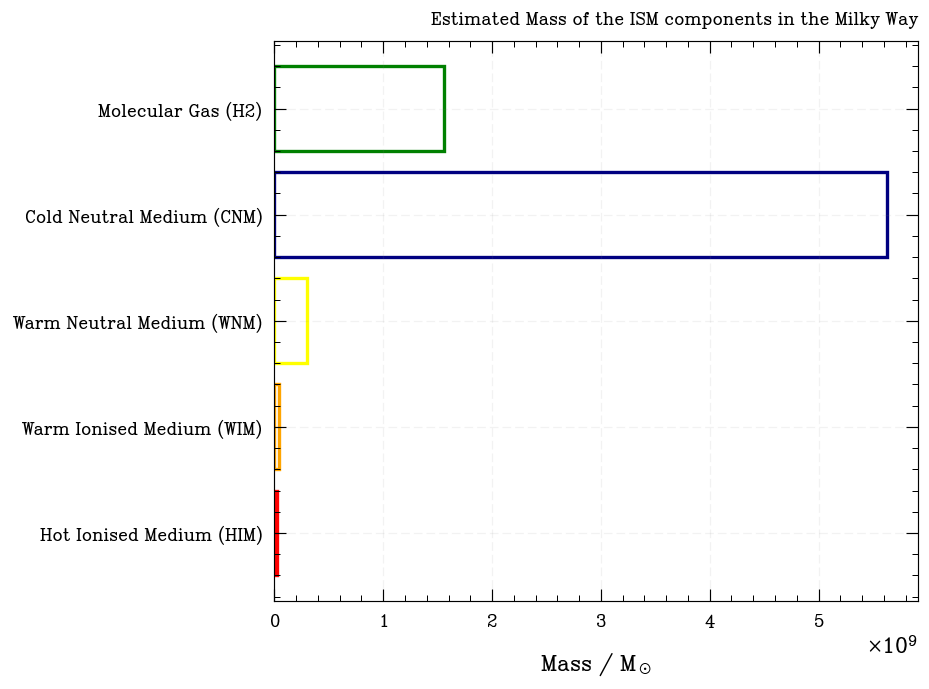

In [5]:
masses = list(mass_results.values())

fig, ax = plt.subplots(figsize = (8, 6))

ax.grid(alpha = 0.1)
ax.set_xlabel(r'Mass / M$_\odot$', fontsize = 15, labelpad = 12)
ax.set_title('Estimated Mass of the ISM components in the Milky Way', fontsize = 12, loc = 'right')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

bars = ax.barh(list(mass_results.keys()), list(mass_results.values()), fill = False, edgecolor = ['red', 'orange', 'yellow', 'navy', 'green'], lw = 2)

plt.tight_layout()
plt.savefig('Q08_ISM_Mass.pdf')

In [6]:
mass_results

{'Hot Ionised Medium (HIM)': 24899798.024930045,
 'Warm Ionised Medium (WIM)': 41360458.437665,
 'Warm Neutral Medium (WNM)': 300228107.92276955,
 'Cold Neutral Medium (CNM)': 5632392200.041511,
 'Molecular Gas (H2)': 1557892131.0730078}

In [7]:
sum(mass_results.values()) / 1e9

7.556772695499883

In [8]:
HIM = mass_results['Hot Ionised Medium (HIM)']
WIM = mass_results['Warm Ionised Medium (WIM)']
WNM = mass_results['Warm Neutral Medium (WNM)']
CNM = mass_results['Cold Neutral Medium (CNM)']
H2 = mass_results['Molecular Gas (H2)']

total_mass = sum(mass_results.values()) / 1e9 

category_masses = {

    "Total Mass": total_mass,

    "(HIM)": HIM / 1e9,
    "(WIM)": WIM / 1e9,
    "(WNM)": WNM / 1e9,
    "(CNM)": CNM / 1e9,
    "(H2)": H2 / 1e9,

}

category_percentages = {
    key: (mass / total_mass) * 100 for key, mass in category_masses.items() if key != "Total Mass"
}

print("Milky Way ISM Mass Distribution:")
for key, mass in category_masses.items():
    print(f"{key}: {mass:.2f} x 10^9 MSun")

for key, percentage in category_percentages.items():
    print(f"{key}: {percentage:.2f}%")

Milky Way ISM Mass Distribution:
Total Mass: 7.56 x 10^9 MSun
(HIM): 0.02 x 10^9 MSun
(WIM): 0.04 x 10^9 MSun
(WNM): 0.30 x 10^9 MSun
(CNM): 5.63 x 10^9 MSun
(H2): 1.56 x 10^9 MSun
(HIM): 0.33%
(WIM): 0.55%
(WNM): 3.97%
(CNM): 74.53%
(H2): 20.62%


### (b)

In [9]:
dataH2 = pd.read_csv('HII.csv', names = ['radius', 'surface_density'])
dataH2

,radius,surface_density
0,0.488552,27.466539
1,1.521923,6.414625
2,2.508323,3.499379
3,3.494722,3.429401
4,4.481122,4.596445
5,5.467522,3.871278
6,6.500893,2.773992
7,7.487293,1.852046
8,8.520664,0.886031
9,9.507063,0.454936


In [10]:
R2 = dataH2.radius
Sigma2 = dataH2.surface_density

M2 = 2 * np.pi * simps(Sigma2 * R2 * 1e3, R2 * 1e4)
M2 * u.Msun

<Quantity 7.95511468e+09 solMass>